In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy

import sys
sys.path.append('../data')
sys.path.append('../Librerias')

import dataset as ds
import utils
import caract as dc


c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/"
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"


cutoff = [8/1000, 11/1000]

set =  ds.MatFileToDataFrame(fpath, fname)
df = set.get_dataframe(cutoff)
df.tail()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform
599995,0.100642,0.083236,-0.000274,-0.000274+0.000622j
599996,0.100313,0.082908,-0.000255,-0.000255+0.000637j
599997,0.099326,0.081921,-0.000236,-0.000236+0.000810j
599998,0.098340,0.080935,-0.000218,-0.000218+0.000840j
599999,0.097025,0.079620,-0.000199,-0.000199+0.001346j


In [6]:
defects = dc.CaractDefect(df)


In [7]:
defects.get_hilbert()[0]

,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,-0.000931+0.001429j,0.001705,2.148369,-0.049881
1,-0.001002+0.001029j,0.001436,2.342887,-0.037877
2,-0.001069+0.001045j,0.001494,2.367512,-0.026438
3,-0.001132+0.000899j,0.001446,2.470476,-0.016091
4,-0.001193+0.000891j,0.001489,2.499732,-0.007256
...,...,...,...,...
599995,-0.000274+0.000622j,0.000679,29991.629730,-0.122759
599996,-0.000255+0.000637j,0.000686,29991.595580,-0.131433
599997,-0.000236+0.000810j,0.000843,29991.498465,-0.140539
599998,-0.000218+0.000840j,0.000868,29991.467828,-0.149889


In [8]:

len(defects.get_peaks())

5016

In [9]:
defects.get_minAmp()

,Min Amp
0,1972
1,1973
2,1974
3,1975
4,2606
...,...
356,591700
357,593838
358,596728
359,596729


In [10]:
min = defects.get_minAmp()['Min Amp'].values
peaks = defects.get_peaks()['Peaks'].values
intersection = np.intersect1d(min, peaks)
intersection


array([  1974,   2606,   4300,   7881,   8805,  10910,  14784,  21795,
        26131,  34973,  42563,  45390,  62017,  70414,  73452,  82966,
        83479,  84043,  88768,  95064,  98391, 132678, 133567, 138344,
       140217, 141360, 141789, 148270, 159933, 183780, 188978, 200273,
       201916, 202035, 219290, 220378, 228223, 230534, 231027, 233524,
       238164, 252464, 259194, 260570, 277752, 279674, 286592, 293255,
       320742, 330655, 333520, 336287, 343099, 349722, 349923, 350159,
       350425, 358583, 364443, 373403, 386628, 418478, 421430, 427961,
       428247, 437346, 441155, 441952, 452156, 454061, 454436, 454917,
       468922, 483199, 486625, 487484, 502024, 509752, 510157, 518591,
       547786, 554495, 559729, 560403, 560594, 567754, 568593, 570364,
       571925, 573421, 575507, 576438, 576613, 591700, 593838, 596729],
      dtype=int64)

In [11]:
display(defects.get_defectos()[1][0])



,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
1474,-0.047323,-0.064728,0.000641,0.000641+0.000550j,0.000844,63.541321,-0.007292
1475,-0.048638,-0.066043,0.000599,0.000599+0.000562j,0.000821,63.585575,-0.006906
1476,-0.054556,-0.071962,0.000557,0.000557+0.000571j,0.000798,63.630261,-0.006303
1477,-0.056200,-0.073606,0.000515,0.000515+0.000578j,0.000774,63.674855,-0.005475
1478,-0.061461,-0.078867,0.000473,0.000473+0.000582j,0.000750,63.719897,-0.004436
...,...,...,...,...,...,...,...
2469,-0.077573,-0.094978,-0.000537,-0.000537-0.000045j,0.000539,116.323487,0.009717
2470,-0.081519,-0.098924,-0.000554,-0.000554-0.000080j,0.000559,116.382997,0.008916
2471,-0.082834,-0.100239,-0.000568,-0.000568-0.000117j,0.000580,116.441662,0.008224
2472,-0.085793,-0.103198,-0.000580,-0.000580-0.000154j,0.000601,116.498976,0.007585


In [12]:
defects.get_defectos()[1]

[      Original Signal  Signal - Mean  Filtered Signal   Hilbert Transform  \
 1474        -0.047323      -0.064728         0.000641  0.000641+0.000550j   
 1475        -0.048638      -0.066043         0.000599  0.000599+0.000562j   
 1476        -0.054556      -0.071962         0.000557  0.000557+0.000571j   
 1477        -0.056200      -0.073606         0.000515  0.000515+0.000578j   
 1478        -0.061461      -0.078867         0.000473  0.000473+0.000582j   
 ...               ...            ...              ...                 ...   
 2469        -0.077573      -0.094978        -0.000537 -0.000537-0.000045j   
 2470        -0.081519      -0.098924        -0.000554 -0.000554-0.000080j   
 2471        -0.082834      -0.100239        -0.000568 -0.000568-0.000117j   
 2472        -0.085793      -0.103198        -0.000580 -0.000580-0.000154j   
 2473        -0.087766      -0.105171        -0.000590 -0.000590-0.000193j   
 
       Amplitude  Instantaneous Phase  Gradient Phase  
 1474 

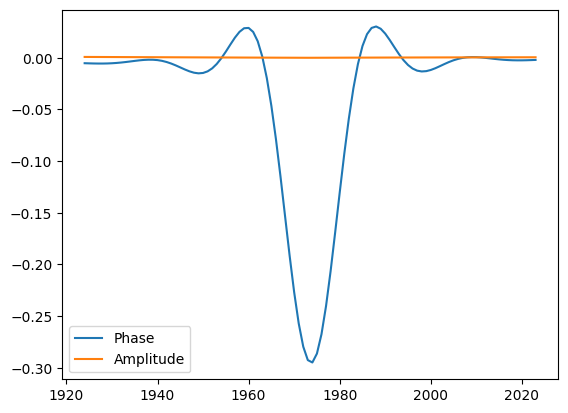

In [13]:
x = defects.get_defectos()[1][0]

plt.plot(x['Gradient Phase'][450:550], label = 'Phase')
plt.plot(x['Amplitude'][450:550], label = 'Amplitude')
plt.legend()
plt.show()

In [14]:
hilbert = defects.get_hilbert()[0]
x, _ = defects.get_defectos()
interval =  15

In [15]:
def get_indices_min(serie, indice, intervalo):
    min1 = np.argmin(np.abs(serie[indice-intervalo: indice]))
    min2 = np.argmin(np.abs(serie[indice: indice+intervalo]))
    return min1+indice-intervalo, min2+indice


In [16]:
min1,min2 = get_indices_min(hilbert['Gradient Phase'], x[0], interval)
print(min1,min2)

1963 1984


In [17]:
def get_minimuns(serie, x, interval):
    min1 = []
    min2 = []
    for elem in x:
        aux1, aux2 = get_indices_min(serie, elem, interval)
        min1.append(aux1)
        min2.append(aux2)

    minimuns = pd.DataFrame({'start': min1, 'end': min2})
    return minimuns


In [18]:
minimuns = get_minimuns(hilbert['Gradient Phase'], x, interval)
minimuns

,start,end
0,1963,1984
1,2595,2617
2,4290,4310
3,7866,7895
4,8795,8815
...,...,...
91,576427,576449
92,576600,576625
93,591690,591710
94,593827,593850


In [19]:
defects.get_mins()

,start,end
0,1963,1984
1,2595,2617
2,4290,4310
3,7866,7895
4,8795,8815
...,...,...
91,576427,576449
92,576600,576625
93,591690,591710
94,593827,593850


In [20]:
min1 = np.argmin(np.abs(hilbert['Gradient Phase'][x[0]-interval:x[0]]))
min2 = np.argmin(np.abs(hilbert['Gradient Phase'][x[0]:x[0]+interval]))
print(min1+x[0]-interval, min2+x[0])


1963 1984


In [21]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [22]:
def get_indices_tau(array, df_general, df_min):

  indices_tau = []
  serie = df_general['Gradient Phase']

  for i, peak in enumerate(array):

    aux2 = df_min['end'].iloc[i]


    num1 =  np.abs(serie[peak])/2
    subset2 = np.abs(serie[peak:aux2])
    
    num2 = find_nearest(subset2, num1)

    indices2 = subset2[np.abs(subset2 == num2)].index[0]
    indices_tau.append(indices2)
    
  return indices_tau

In [23]:
x, _ = defects.get_defectos()
hilbert, _ = defects.get_hilbert()
min = defects.get_mins()

In [24]:
indices = get_indices_tau(x, hilbert, min)
indices

[1980,
 2612,
 4305,
 7888,
 8811,
 10916,
 14790,
 21801,
 26137,
 34980,
 42570,
 45396,
 62024,
 70420,
 73457,
 82972,
 83485,
 84049,
 88774,
 95070,
 98397,
 132685,
 133572,
 138350,
 140223,
 141365,
 141795,
 148276,
 159939,
 183786,
 188985,
 200279,
 201922,
 202041,
 219296,
 220384,
 228230,
 230539,
 231034,
 233530,
 238170,
 252470,
 259200,
 260577,
 277758,
 279681,
 286598,
 293261,
 320748,
 330661,
 333526,
 336293,
 343105,
 349728,
 349929,
 350165,
 350432,
 358589,
 364449,
 373409,
 386634,
 418484,
 421436,
 427966,
 428253,
 437352,
 441161,
 441958,
 452163,
 454067,
 454443,
 454923,
 468927,
 483205,
 486632,
 487491,
 502030,
 509758,
 510164,
 518597,
 547792,
 554502,
 559737,
 560409,
 560600,
 567760,
 568599,
 570370,
 571931,
 573427,
 575512,
 576444,
 576619,
 591706,
 593844,
 596735]

In [25]:
defects.get_tau_indices()

,peak,start,end,tau
0,1974,1963,1984,1980
1,2606,2595,2617,2612
2,4300,4290,4310,4305
3,7881,7866,7895,7888
4,8805,8795,8815,8811
...,...,...,...,...
91,576438,576427,576449,576444
92,576613,576600,576625,576619
93,591700,591690,591710,591706
94,593838,593827,593850,593844


In [26]:
defects.get_tau()[1].describe()


,duration,tau,app_time
count,96.000000,96.000000,95.000000
mean,22.489583,12.229167,6238.084211
std,2.513102,1.080732,7118.834945
min,20.000000,10.000000,98.000000
25%,21.000000,12.000000,1236.000000
50%,22.000000,12.000000,3788.000000
75%,23.000000,12.000000,8253.000000
max,29.000000,16.000000,34265.000000


In [27]:
indx_defects, _ = defects.get_defectos()
indx_defects

array([  1974,   2606,   4300,   7881,   8805,  10910,  14784,  21795,
        26131,  34973,  42563,  45390,  62017,  70414,  73452,  82966,
        83479,  84043,  88768,  95064,  98391, 132678, 133567, 138344,
       140217, 141360, 141789, 148270, 159933, 183780, 188978, 200273,
       201916, 202035, 219290, 220378, 228223, 230534, 231027, 233524,
       238164, 252464, 259194, 260570, 277752, 279674, 286592, 293255,
       320742, 330655, 333520, 336287, 343099, 349722, 349923, 350159,
       350425, 358583, 364443, 373403, 386628, 418478, 421430, 427961,
       428247, 437346, 441155, 441952, 452156, 454061, 454436, 454917,
       468922, 483199, 486625, 487484, 502024, 509752, 510157, 518591,
       547786, 554495, 559729, 560403, 560594, 567754, 568593, 570364,
       571925, 573421, 575507, 576438, 576613, 591700, 593838, 596729],
      dtype=int64)

In [28]:
hilbert, _ = defects.get_hilbert()
hilbert_nd = copy.copy(hilbert)
duration =  int(np.mean(defects.get_tau()[1]['duration'].values))

In [29]:

for index in indx_defects:
    hilbert_nd[index-duration:index+duration] = np.nan


In [30]:
hilbert_nd[indx_defects[3]-50:indx_defects[3]+50]

,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
7831,-0.000296+0.000028j,0.000298,342.340234,-0.005318
7832,-0.000292+0.000014j,0.000293,342.384759,-0.005126
7833,-0.000288+0.000001j,0.000288,342.429636,-0.004946
7834,-0.000282-0.000012j,0.000282,342.474474,-0.004785
7835,-0.000276-0.000024j,0.000277,342.519678,-0.004649
...,...,...,...,...
7926,-0.000185-0.000252j,0.000312,349.653209,-0.001548
7927,-0.000176-0.000266j,0.000319,349.701433,-0.001577
7928,-0.000167-0.000280j,0.000326,349.749475,-0.001635
7929,-0.000156-0.000293j,0.000332,349.797526,-0.001716


In [31]:
x = defects.get_no_defectos()[0][indx_defects[3]-50:indx_defects[3]+50]
x 

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform
7831,0.001341,-0.016064,-0.000296,-0.000296+0.000028j
7832,0.001341,-0.016064,-0.000292,-0.000292+0.000014j
7833,0.001670,-0.015735,-0.000288,-0.000288+0.000001j
7834,0.000355,-0.017050,-0.000282,-0.000282-0.000012j
7835,-0.000632,-0.018037,-0.000276,-0.000276-0.000024j
...,...,...,...,...
7926,-0.007208,-0.024613,-0.000185,-0.000185-0.000252j
7927,-0.006550,-0.023955,-0.000176,-0.000176-0.000266j
7928,-0.007865,-0.025271,-0.000167,-0.000167-0.000280j
7929,-0.007537,-0.024942,-0.000156,-0.000156-0.000293j


In [38]:
y, h = defects.get_no_defectos()
data = pd.merge(y, h, on = 'Hilbert Transform', how = 'outer')


,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
71960251,0.100642,0.083236,-0.000274,-0.000274+0.000622j,0.000679,29991.629730,-0.122759
71960252,0.100313,0.082908,-0.000255,-0.000255+0.000637j,0.000686,29991.595580,-0.131433
71960253,0.099326,0.081921,-0.000236,-0.000236+0.000810j,0.000843,29991.498465,-0.140539
71960254,0.098340,0.080935,-0.000218,-0.000218+0.000840j,0.000868,29991.467828,-0.149889
71960255,0.097025,0.079620,-0.000199,-0.000199+0.001346j,0.001361,29991.361211,-0.159250


In [36]:
data['Amplitude'].describe()

count    591552.000000
mean          0.001007
std           0.000643
min           0.000011
25%           0.000599
50%           0.000884
75%           0.001236
max           0.007783
Name: Amplitude, dtype: float64

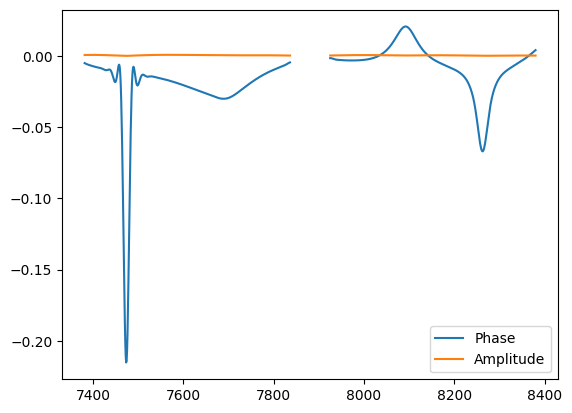

In [32]:
y = defects.get_no_defectos()[1][indx_defects[3]-500:indx_defects[3]+500]

plt.plot(y['Gradient Phase'], label = 'Phase')
plt.plot(y['Amplitude'], label = 'Amplitude')
plt.legend()
plt.show()

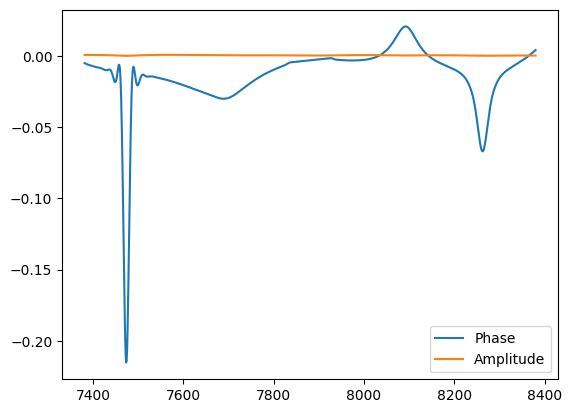

In [33]:
x = y.copy()
x.interpolate(method='values', inplace=True, limit_direction='both')

plt.plot(x['Gradient Phase'], label = 'Phase')
plt.plot(x['Amplitude'], label = 'Amplitude')
plt.legend()
plt.show()